In [1]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [2]:
data = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.data', sep='\t', header=None)

data.columns = ['User', 'Item', 'Rating', 'Timestamp']
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s').dt.strftime('%Y-%m-%d')

In [3]:
genre = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.genre', sep='|', header=None)
genre.columns = ['Genre', 'ID']

In [4]:
user = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.user', sep='|', header=None)
user.columns = ['ID', 'Age', 'Gender', 'Occupation', 'Zip Code']

In [5]:
movie = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', sep='|', header=None, encoding = "ISO-8859-1")
movie.columns = ['Movie ID', 'Movie Title' , 'Release Date', 'Video Release Date',
                'IMDb URL' , 'Unknown' , 'Action' , 'Adventure' , 'Animation' ,
                "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
                'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
                'Thriller' , 'War' , 'Western']

In [98]:
# Each line represents one rating of one movie by one user. 
data.head()

,User,Item,Rating,Timestamp
0,196,242,3,1997-12-04
1,186,302,3,1998-04-04
2,22,377,1,1997-11-07
3,244,51,2,1997-11-27
4,166,346,1,1998-02-02


In [7]:
# The movie genres
genre.head()

,Genre,ID
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [688]:
# Each line provides the details of one user. 
user.head()

,ID,Age,Gender,Occupation,Zip Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
# Each line provides details of one movie
movie.head()

,Movie ID,Movie Title,Release Date,Video Release Date,IMDb URL,Unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Task 1

In [10]:
# Calculate average ratings for each movie
avg_ratings = []

for i in range(1, len(movie)+1):
    avg_ratings.append(data[data['Item'] == i]['Rating'].mean())

In [11]:
# Add average ratings to the movie dataframe itself for easier use
movie['Avg Rating'] = pd.DataFrame(avg_ratings)

In [12]:
# View
movie.head()

,Movie ID,Movie Title,Release Date,Video Release Date,IMDb URL,Unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Avg Rating
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3.878319
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,3.206107
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.033333
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.550239
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.302326


In [13]:
# View by highest rated films
movie.sort_values('Avg Rating', ascending=False).head()

,Movie ID,Movie Title,Release Date,Video Release Date,IMDb URL,Unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Avg Rating
813,814,"Great Day in Harlem, A (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Great%20Day%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1598,1599,Someone Else's America (1995),10-May-1996,NaN,http://us.imdb.com/M/title-exact?Someone%20Els...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1200,1201,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Marlene%20Die...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1121,1122,They Made Me a Criminal (1939),01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?They%20Made%2...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1652,1653,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Entertaining%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0


In [14]:
# Create dictionary to store best films of each genre
# Each genre name acts as the string key
# The values are initialised to empty strings

bestMoviesOfGenres = {}

for i in range(19):
    bestMoviesOfGenres[genre['Genre'][i]] = ''

In [15]:
# View empty dict
bestMoviesOfGenres

{'Action': '',
 'Adventure': '',
 'Animation': '',
 "Children's": '',
 'Comedy': '',
 'Crime': '',
 'Documentary': '',
 'Drama': '',
 'Fantasy': '',
 'Film-Noir': '',
 'Horror': '',
 'Musical': '',
 'Mystery': '',
 'Romance': '',
 'Sci-Fi': '',
 'Thriller': '',
 'War': '',
 'Western': '',
 'unknown': ''}

In [16]:
# For each genre genre column (5:24), loop through all the rows, and everytime its value = 1, 
# get that row's movie's average rating, and if its higher than bestRating, update the bestRating's value

# Initialise
bestRating = 0.0
bestMovies = ['']

# Loop
for col in range(5, 24): # Loop through all genre columns
    for row in range((len(movie))): # Loop through all rows
        
        if (movie.iloc[row, col] == 1): # If a movie belongs to a genre
            if (movie.iloc[row]['Avg Rating'] >= bestRating): # See if current movie's avg rating is best
                
                # If there is another movie with 5.0 rating, add it to the list of best movies of this genre
                if (movie.iloc[row]['Avg Rating'] == bestRating):
                    bestMovies.append(movie.iloc[row]['Movie Title'])
                
                # Else just update the current best movie (which is the first (also last) value in this list)
                else:
                    bestMovies[-1] = movie.iloc[row]['Movie Title']
                    
                # Update best rating value
                bestRating = movie.iloc[row]['Avg Rating'] 
    
    # Declare best movie(s) of current genre to that genre's dict value
    bestMoviesOfGenres[genre['Genre'][col-5]] = bestMovies
    
    # Reset values next genre
    bestRating = 0.0
    bestMovies = ['']
    

In [17]:
# View full dict, ie the best movies of each genre
bestMoviesOfGenres

{'Action': ['Star Wars (1977)'],
 'Adventure': ['Star Kid (1997)'],
 'Animation': ['Close Shave, A (1995)'],
 "Children's": ['Star Kid (1997)'],
 'Comedy': ['Santa with Muscles (1996)'],
 'Crime': ['They Made Me a Criminal (1939)'],
 'Documentary': ['Great Day in Harlem, A (1994)',
  'Marlene Dietrich: Shadow and Light (1996) '],
 'Drama': ['They Made Me a Criminal (1939)',
  'Prefontaine (1997)',
  'Saint of Fort Washington, The (1993)',
  'Aiqing wansui (1994)',
  "Someone Else's America (1995)",
  'Entertaining Angels: The Dorothy Day Story (1996)'],
 'Fantasy': ['Star Kid (1997)'],
 'Film-Noir': ['Manchurian Candidate, The (1962)'],
 'Horror': ['Psycho (1960)'],
 'Musical': ['Wizard of Oz, The (1939)'],
 'Mystery': ['Rear Window (1954)'],
 'Romance': ['Casablanca (1942)'],
 'Sci-Fi': ['Star Kid (1997)'],
 'Thriller': ['Close Shave, A (1995)'],
 'War': ["Schindler's List (1993)"],
 'Western': ['High Noon (1952)'],
 'unknown': ['unknown']}

In [18]:
# Another way of printing
for key,values in bestMoviesOfGenres.items():
    for v in values:
        print(key," : ",v)

unknown  :  unknown
Action  :  Star Wars (1977)
Adventure  :  Star Kid (1997)
Animation  :  Close Shave, A (1995)
Children's  :  Star Kid (1997)
Comedy  :  Santa with Muscles (1996)
Crime  :  They Made Me a Criminal (1939)
Documentary  :  Great Day in Harlem, A (1994)
Documentary  :  Marlene Dietrich: Shadow and Light (1996) 
Drama  :  They Made Me a Criminal (1939)
Drama  :  Prefontaine (1997)
Drama  :  Saint of Fort Washington, The (1993)
Drama  :  Aiqing wansui (1994)
Drama  :  Someone Else's America (1995)
Drama  :  Entertaining Angels: The Dorothy Day Story (1996)
Fantasy  :  Star Kid (1997)
Film-Noir  :  Manchurian Candidate, The (1962)
Horror  :  Psycho (1960)
Musical  :  Wizard of Oz, The (1939)
Mystery  :  Rear Window (1954)
Romance  :  Casablanca (1942)
Sci-Fi  :  Star Kid (1997)
Thriller  :  Close Shave, A (1995)
War  :  Schindler's List (1993)
Western  :  High Noon (1952)


## Task 2

In [19]:
data.sort_values('User', ascending=True).head()

,User,Item,Rating,Timestamp
66567,1,55,5,1997-09-24
62820,1,203,4,1997-11-03
10207,1,183,5,1997-09-24
9971,1,150,5,1997-10-15
22496,1,68,4,1997-09-24


In [24]:
# Movies with most ratings
rating_count = list(data.groupby('Item')['Rating'].count())

In [25]:
# Add this column to movie table
movie['Rating Count'] = rating_count

In [147]:
# View
movie.sort_values('Rating Count', ascending=False).head()

,Movie ID,Movie Title,Release Date,Video Release Date,IMDb URL,Unknown,Action,Adventure,Animation,Children's,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Avg Rating,Rating Count
49,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,...,0,0,0,1,1,0,1,0,4.358491,583
257,258,Contact (1997),11-Jul-1997,NaN,http://us.imdb.com/Title?Contact+(1997/I),0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.803536,509
99,100,Fargo (1996),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.155512,508
180,181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,...,0,0,0,1,1,0,1,0,4.007890,507
293,294,Liar Liar (1997),21-Mar-1997,NaN,http://us.imdb.com/Title?Liar+Liar+(1997),0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.156701,485


In [131]:
movie.iloc[2:10]

,Movie ID,Movie Title,Release Date,Video Release Date,IMDb URL,Unknown,Action,Adventure,Animation,Children's,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Avg Rating,Rating Count
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.033333,90
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3.550239,209
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.302326,86
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.576923,26
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.798469,392
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,3.995434,219
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.896321,299
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3.831461,89


In [290]:
# We want to remove the movies which have a rating count, or ones which have a high rating but low count
#movie.sort_values('Rating Count', ascending=True).head()

threshold = 10
dropList = list((movie[movie['Rating Count'] < threshold]['Movie ID']))
print(len(dropList))

530


In [648]:
myTable = pd.DataFrame()

In [649]:
myTable['User'] = data.User
myTable['Movie ID'] = data.Item
myTable['Rating'] = data.Rating

In [651]:
print(len(myTable))

100000


In [652]:
dropListIndices = []

for i in range(len(dropList)):
    dropListIndices.append((myTable[myTable['Movie ID']==dropList[i]].index.values.tolist()))

# Flatten
dropListIndices = [item for sublist in dropListIndices for item in sublist]

In [653]:
print(len(dropListIndices))

2047


In [654]:
# Remove the values with rating counts lower than the threshold
myTable.drop(myTable.index[dropListIndices], axis=0, inplace=True)

In [655]:
# Check if rows have been deleted
print(len(myTable)) 

97953


In [656]:
# Make a list of the indexes of the top movies this user already likes

# Take a movie our target user loves
alreadyLikedMovieID = myPivot.loc[900].idxmax()
print(alreadyLikedMovieID)

# Store value
realRating = myPivot.loc[900][alreadyLikedMovieID]
print(realRating)

# See name of movie
alreadyLikedMovieName = movie[movie['Movie ID'] == alreadyLikedMovieID]['Movie Title'].values.tolist()[0]
print(alreadyLikedMovieName)

589
5.0
Wild Bunch, The (1969)


In [657]:
# Change that value to 0.0
myPivot.loc[900][alreadyLikedMovieID] = 0.0
myPivot.loc[900][alreadyLikedMovieID]

0.0

In [658]:
myTable.sort_values('User', ascending=True).head()

,User,Movie ID,Rating
66567,1,55,5
77073,1,124,5
3836,1,70,3
22845,1,176,5
9382,1,163,4


In [659]:
# Build pivot table
myPivot = pd.pivot_table(myTable, values='Rating', index=['User'], columns=['Movie ID'])

In [660]:
# Fill NaN values with 0.0
myPivot = myPivot.fillna(0)

# View
myPivot.head()

Movie ID,1,2,3,4,5,6,7,8,9,10,...,1446,1451,1469,1478,1480,1483,1503,1518,1540,1615
User,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [661]:
# We want k neighbours, within a radius of 0.5
neigh = NearestNeighbors(50, 0.5)

# Train the model using the training sets
(neigh.fit(myPivot.iloc[0:899]))

#Predict Output
distList, idxList = (neigh.kneighbors([myPivot.iloc[900]]))

# Put into nice flat seperate lists
idxList = idxList.tolist()
idxList = [item for sublist in idxList for item in sublist]

print("Length:", len(idxList))
print(idxList)

Length: 50
[19, 410, 637, 470, 54, 289, 274, 102, 512, 699, 92, 768, 722, 799, 745, 583, 778, 52, 181, 894, 123, 230, 784, 201, 849, 207, 622, 683, 548, 237, 611, 339, 602, 878, 136, 351, 332, 884, 796, 440, 601, 701, 648, 336, 562, 777, 244, 823, 246, 691]


In [662]:
# Add the user at the top of the list
idxList.insert(0, 900)

In [663]:
print(idxList)

[900, 19, 410, 637, 470, 54, 289, 274, 102, 512, 699, 92, 768, 722, 799, 745, 583, 778, 52, 181, 894, 123, 230, 784, 201, 849, 207, 622, 683, 548, 237, 611, 339, 602, 878, 136, 351, 332, 884, 796, 440, 601, 701, 648, 336, 562, 777, 244, 823, 246, 691]


In [664]:
# Make a seperate table of the user and its k closest neighbours
kNNTable = myPivot.loc[idxList]
kNNTable = kNNTable.replace(0, pand) # Put back NaNs for simpler mean calculation
kNNTable.head()

Movie ID,1,2,3,4,5,6,7,8,9,10,...,1446,1451,1469,1478,1480,1483,1503,1518,1540,1615
User,,,,,,,,,,,,,,,,,,,,,
900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [665]:
# Calculate predicted ratings for our user, which is the mean rating of nearest neighbour's ratings for each film

# For each col in kNN table
for col in kNNTable: 
    # These are the predicted ratings for our user
    kNNTable.loc[900][col] = kNNTable[1:][col].mean() 

In [666]:
# Show table with new values - we can see our user's row now has mean values
kNNTable.head()

Movie ID,1,2,3,4,5,6,7,8,9,10,...,1446,1451,1469,1478,1480,1483,1503,1518,1540,1615
User,,,,,,,,,,,,,,,,,,,,,
900,3.5,NaN,NaN,4.0,NaN,NaN,2.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [667]:
predictedRating = kNNTable.loc[900][alreadyLikedMovieID]
print(predictedRating)

nan


In [668]:
# Get a movie highly rated by our target user
topMovie = myPivot.iloc[i].max()

In [669]:
# Make a list of the indexes of the top movies this user is predicted to like
recoMoviesIndexList = list(kNNTable.loc[900][kNNTable.loc[900] == kNNTable.loc[900].max()].index)
recoMoviesRatingsList = list(kNNTable.loc[900][kNNTable.loc[900] == kNNTable.loc[900].max()])
print(recoMoviesRatingsList)
print(recoMoviesIndexList)

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
[8, 151, 269, 274, 276, 408, 435]


In [670]:
# Print out the name of these movies using the indexes
# We have to use an extra loop to reach and print out the title strings 
# rather than printing an array containing the title string

likedMoviePredicted = False

print('For user 900, the recommended movies are: \n')
for recoMovieIndex in recoMoviesIndexList:
    for stringTitle in movie[movie['Movie ID']==recoMovieIndex]['Movie Title'].values:
        print(stringTitle)
        if (alreadyLikedMovieName == stringTitle):
            #likedMoviePredicted = True
            print("Our algorithm correctly predicts a movie the user had loved ! :)")
            
if (likedMoviePredicted):
    print('')
    print("Our algorithm correctly predicts a movie the user had loved ! :)")

For user 900, the recommended movies are: 

Babe (1995)
Willy Wonka and the Chocolate Factory (1971)
Full Monty, The (1997)
Sabrina (1995)
Leaving Las Vegas (1995)
Close Shave, A (1995)
Butch Cassidy and the Sundance Kid (1969)


In [617]:
mean_squared_error = ((realRating - predictedRating)**2)
mean_squared_error

1.0

In [618]:
# The movies our user liked the most
for i in (list(movie[movie['Movie ID']==myPivot.loc[900].idxmax()]['Movie Title'].values)):
    print(i)

Wild Bunch, The (1969)


## Automised version (Task 2)

Above we trained the model on 900 users and tested it on 1 user. Below is the code to get the recommended movies for all the remaining 943-900 = 43 users.

In [587]:
# Makes a list of movie we have to drop in myTable

def makeDropList(threshold):
    
    # threshold = 10
    dropList = list((movie[movie['Rating Count'] < threshold]['Movie ID']))
    # print(len(dropList))
    
    return dropList

In [588]:
# Makes myTable used for making myPivot

def makeTable():
    
    myTable = pd.DataFrame()
    
    myTable['User'] = data.User
    myTable['Movie ID'] = data.Item
    myTable['Rating'] = data.Rating

In [684]:
def getAlreadyLikedMovie(i):
    
    # Take a movie our target user loves
    alreadyLikedMovieID = myPivot.loc[i].idxmax()
    # print(alreadyLikedMovieID)

    # Store value
    realRating = myPivot.loc[i][alreadyLikedMovieID]
    # print(realRating)

    # See name of movie
    alreadyLikedMovieName = movie[movie['Movie ID'] == alreadyLikedMovieID]['Movie Title'].values.tolist()[0]
    # print(alreadyLikedMovieName)
    
    return alreadyLikedMovieName

In [590]:
# Drops the movies in myTable for getting the index of each item in makeDropList, and converting the 
# whole list of indices into a flat Python list

def dropMovies(myDropList):
    
    dropListIndices = []

    # Get the indices of myTable of the movies to be dropped - easier to drop with index values
    for i in range(len(dropList)):
        dropListIndices.append((myTable[myTable['Movie ID']==myDropList[i]].index.values.tolist()))

    # Flatten
    dropListIndices = [item for sublist in dropListIndices for item in sublist]
    
    # Drop - simple
    myTable.drop(myTable.index[dropListIndices], axis=0, inplace=True)

In [591]:
# Make pivot/matrix with myTable (having dropped the movies below the threshold)

def makePivot():
    
    # Build pivot table
    myPivot = pd.pivot_table(myTable, values='Rating', index=['User'], columns=['Movie ID'])
    
    # Fill NaN values with 0.0
    myPivot = myPivot.fillna(0)

In [807]:
def getRecommendations(i, alreadyLikedMovieName):
    
    # FIT 
    # Put input vector into model, and get output distances and index of k closest neighbours
    distList, idxList = (neigh.kneighbors([myPivot.iloc[i]]))
    
    # Put into nice flat seperate lists
    idxList = idxList.tolist()
    idxList = [item for sublist in idxList for item in sublist]
    
    # Add the user i at the top of the list
    idxList.insert(0, i)
    
    # Make a seperate table of the user and its k closest neighbours
    kNNTable = myPivot.loc[idxList]
    
    # Change that already liked movie value to 0.0 in the kNN table
    kNNTable.loc[i][alreadyLikedMovieID] = 0.0
    
    kNNTable = kNNTable.replace(0, np.NaN) # Put back NaNs for simpler mean calculation
    # kNNTable.head()
    
    # Calculate predicted ratings for our user
    for col in kNNTable: 
        kNNTable.loc[i][col] = kNNTable[1:][col].mean() 
        
    # Show table with new values
    # kNNTable.head()
    
    # Calculate predicted rating
    predictedRating = kNNTable.loc[i][alreadyLikedMovieID]
    # print(predictedRating)
    
    # Make a list of the indexes of the top movies this user is predicted to like
    # recoMoviesIndexList = list(kNNTable.loc[i][kNNTable.loc[i] == kNNTable.loc[i].max()].index)
    # print(list(kNNTable.loc[i][kNNTable.loc[i] == kNNTable.loc[i].max()]))
     
    myRow = (kNNTable.loc[i:i].sort_values(by=i , axis=1, ascending=False))
    recoMoviesIndexList = myRow.iloc[0,:10].index.tolist()
    
    mean_squared_error = ((realRating - predictedRating)**2)
    
    # Make list of names
    likedMoviePredicted = False
    
    for recoMovieIndex in recoMoviesIndexList:
        for stringTitle in movie[movie['Movie ID']==recoMovieIndex]['Movie Title'].values:
            print('   ', stringTitle)
            if (alreadyLikedMovieName == stringTitle):
                likedMoviePredicted = True
    
    print('')
    #if (isinstance(predictedRating, float)):
        #print("Mean Square Error:", mean_squared_error)
    #print('Liked movie:', alreadyLikedMovieName)
    print('')
    
    if likedMoviePredicted:
        print("Our algorithm correctly predicts a movie the user had loved ! :)")
        print('')
    
    # Return list of movie names
    #return movieNames

In [808]:
# === CONFIGURE PARAMETERS ===
k = 100
k_radius = 1
threshold = 10
# ============================

myDropList = makeDropList(threshold)
makeTable()
dropMovies(myDropList)
makePivot()

# TRAINING - 900 users
# We want k neighbours, within a radius of k_radius
neigh = NearestNeighbors(k, k_radius)

# Train the model using the training sets eg the first 900 users
neigh.fit(myPivot.iloc[0:899])

# TESTING - 43 users
for i in range(900, 910):

    alreadyLikedMovieName = getAlreadyLikedMovie(i)
    print('For user', i, 'the top recommended movies are:')
    myMovies = (getRecommendations(i, alreadyLikedMovieName))
    

For user 900 the top recommended movies are:
    Incognito (1997)
    My Man Godfrey (1936)
    Four Days in September (1997)
    Quiet Man, The (1952)
    Alphaville (1965)
    Paths of Glory (1957)
    To Live (Huozhe) (1994)
    8 1/2 (1963)
    Women, The (1939)
    Duck Soup (1933)


For user 901 the top recommended movies are:
    Stalker (1979)
    Foreign Correspondent (1940)
    Free Willy 2: The Adventure Home (1995)
    Spice World (1997)
    Meet John Doe (1941)
    Top Hat (1935)
    Wrong Trousers, The (1993)
    Casablanca (1942)
    Rear Window (1954)
    Once Upon a Time in the West (1969)


For user 902 the top recommended movies are:
    Ponette (1996)
    Incognito (1997)
    Four Days in September (1997)
    Miami Rhapsody (1995)
    Grand Day Out, A (1992)
    Wallace & Gromit: The Best of Aardman Animation (1996)
    M (1931)
    Schindler's List (1993)
    Casablanca (1942)
    Shawshank Redemption, The (1994)


For user 903 the top recommended movies are:
    M

## Task 3

In [692]:
gender_dummies = pd.get_dummies(user['Gender'])
gender_dummies.head()

,F,M
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [693]:
job_dummies = pd.get_dummies(user['Occupation'])
job_dummies.head()

,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [694]:
age_dummies = pd.get_dummies(user['Age'])
age_dummies.head()

,7,10,11,13,14,15,16,17,18,19,...,61,62,63,64,65,66,68,69,70,73
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [695]:
zipcode_dummies = pd.get_dummies(user['Zip Code'])
zipcode_dummies.head()

,00000,01002,01040,01080,01331,01375,01581,01602,01701,01720,...,N2L5N,N4T1A,R3T5K,T8H1N,V0R2H,V0R2M,V1G4L,V3N4P,V5A2B,Y1A6B
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [745]:
def makeImprovedPivot():

    myImprovedPivot = myPivot

    myImprovedPivot = pd.concat([myImprovedPivot, gender_dummies], axis=1)
    myImprovedPivot = pd.concat([myImprovedPivot, job_dummies], axis=1)
    myImprovedPivot = pd.concat([myImprovedPivot, age_dummies], axis=1)
    myImprovedPivot = pd.concat([myImprovedPivot, zipcode_dummies], axis=1)

    # Fill NaN values with 0.0
    myImprovedPivot = myImprovedPivot.fillna(0)

    # myImprovedPivot.head()

In [809]:
def getImprovedRecommendations(i, myImprovedPivot, alreadyLikedMovieName):
    
    # FIT 
    # Put input vector into model, and get output distances and index of k closest neighbours
    distList, idxList = (neigh.kneighbors([myImprovedPivot.iloc[i]]))
    
    # Put into nice flat seperate lists
    idxList = idxList.tolist()
    idxList = [item for sublist in idxList for item in sublist]
    
    # Add the user i at the top of the list
    idxList.insert(0, i)
    
    # Make a seperate table of the user and its k closest neighbours
    kNNTable = myImprovedPivot.loc[idxList]
    
    # Change that already liked movie value to 0.0 in the kNN table
    kNNTable.loc[i][alreadyLikedMovieID] = 0.0
    
    kNNTable = kNNTable.replace(0, np.NaN) # Put back NaNs for simpler mean calculation
    # kNNTable.head()
    
    # Calculate predicted ratings for our user
    for col in kNNTable: 
        kNNTable.loc[i][col] = kNNTable[1:][col].mean() 
        
    # Show table with new values
    # kNNTable.head()
    
    # Calculate predicted rating
    predictedRating = kNNTable.loc[i][alreadyLikedMovieID]
    # print(predictedRating)
    
    # Make a list of the indexes of the top movies this user is predicted to like
    # recoMoviesIndexList = list(kNNTable.loc[i][kNNTable.loc[i] == kNNTable.loc[i].max()].index)
    # print(list(kNNTable.loc[i][kNNTable.loc[i] == kNNTable.loc[i].max()]))
     
    myRow = (kNNTable.loc[i:i].sort_values(by=i , axis=1, ascending=False))
    recoMoviesIndexList = myRow.iloc[0,:10].index.tolist()
    
    mean_squared_error = ((realRating - predictedRating)**2)
    
    # Make list of names
    likedMoviePredicted = False
    
    for recoMovieIndex in recoMoviesIndexList:
        for stringTitle in movie[movie['Movie ID']==recoMovieIndex]['Movie Title'].values:
            print('   ', stringTitle)
            if (alreadyLikedMovieName == stringTitle):
                likedMoviePredicted = True
    
    print('')
    #if (isinstance(predictedRating, float)):
    #    print("Mean Square Error:", mean_squared_error)
    #print('Liked movie:', alreadyLikedMovieName)
    print('')
    
    if likedMoviePredicted:
        print("Our algorithm correctly predicts a movie the user had loved ! :)")
        print('')
    
    # Return list of movie names
    #return movieNames

In [810]:
# === CONFIGURE PARAMETERS ===
k = 50
k_radius = 0.5
threshold = 10
# ============================

myDropList = makeDropList(threshold)
makeTable()
dropMovies(myDropList)
makePivot()
makeImprovedPivot()

# TRAINING - 900 users
# We want k neighbours, within a radius of k_radius
neigh = NearestNeighbors(k, k_radius)

# Train the model using the training sets eg the first 900 users
neigh.fit(myImprovedPivot.iloc[0:899])

# TESTING - 43 users
for i in range(900, 910):

    alreadyLikedMovieName = getAlreadyLikedMovie(i)
    print('For user', i, 'the top recommended movies are:')
    myMovies = (getImprovedRecommendations(i, myImprovedPivot, alreadyLikedMovieName))
    

For user 900 the top recommended movies are:
    She's the One (1996)
    Love! Valour! Compassion! (1997)
    Alien (1979)
    Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)
    Swingers (1996)
    Until the End of the World (Bis ans Ende der Welt) (1991)
    Mars Attacks! (1996)
    Little Princess, A (1995)
    Little Women (1994)
    Frighteners, The (1996)


For user 901 the top recommended movies are:
    Vertigo (1958)
    Strange Days (1995)
    Clerks (1994)
    Sleepers (1996)
    Ben-Hur (1959)
    Bringing Up Baby (1938)
    To Catch a Thief (1955)
    Bound (1996)
    Aladdin and the King of Thieves (1996)
    Man Without a Face, The (1993)


For user 902 the top recommended movies are:
    It Happened One Night (1934)
    French Kiss (1995)
    Absolute Power (1997)
    Wedding Singer, The (1998)
    Little Women (1994)
    Much Ado About Nothing (1993)
    Big Lebowski, The (1998)
    One Flew Over the Cuckoo's Nest (1975)
    Twister (19

## Graphs

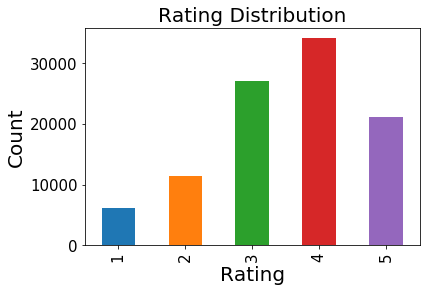

In [777]:
# Visualise rating's distribution
data.Rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution').set_fontsize(20) 
plt.xlabel('Rating').set_fontsize(20) 
plt.ylabel('Count').set_fontsize(20) 
plt.tick_params(labelsize=15)
plt.savefig('/Users/eklavya/Dropbox/Bath/Applied Data Science/Lab2/Report/Images/rating.png', bbox_inches='tight')
plt.show()



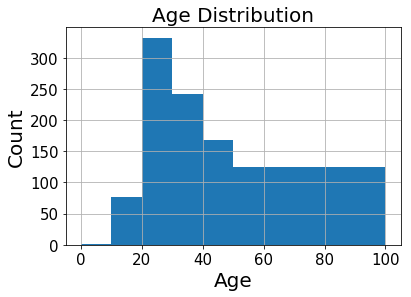

In [778]:
# Visualise user's info
user.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution').set_fontsize(20) 
plt.xlabel('Age').set_fontsize(20) 
plt.ylabel('Count').set_fontsize(20) 
plt.tick_params(labelsize=15)
plt.savefig('/Users/eklavya/Dropbox/Bath/Applied Data Science/Lab2/Report/Images/age.png', bbox_inches='tight')
plt.show()


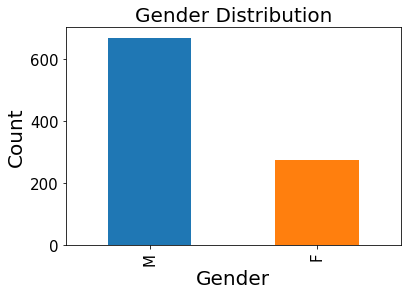

In [779]:
# Visualise gender distribution
user.Gender.value_counts(sort=False).plot(kind='bar')
plt.tick_params(labelsize=15)
plt.title('Gender Distribution').set_fontsize(20) 
plt.xlabel('Gender').set_fontsize(20) 
plt.ylabel('Count').set_fontsize(20) 
plt.savefig('/Users/eklavya/Dropbox/Bath/Applied Data Science/Lab2/Report/Images/gender.png', bbox_inches='tight')
plt.show()



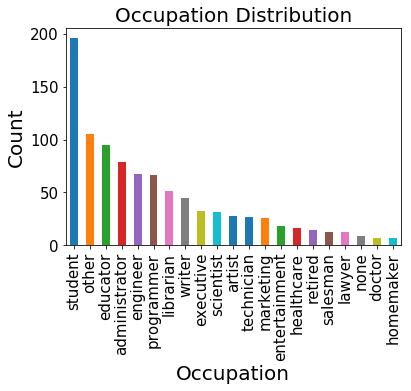

In [783]:
# Visualise gender distribution
user.Occupation.value_counts(sort=True).plot(kind='bar')
plt.title('Occupation Distribution').set_fontsize(20) 
plt.xlabel('Occupation').set_fontsize(20) 
plt.ylabel('Count').set_fontsize(20) 
plt.tick_params(labelsize=15)
plt.savefig('/Users/eklavya/Dropbox/Bath/Applied Data Science/Lab2/Report/Images/occupation.png', bbox_inches='tight')
plt.show()

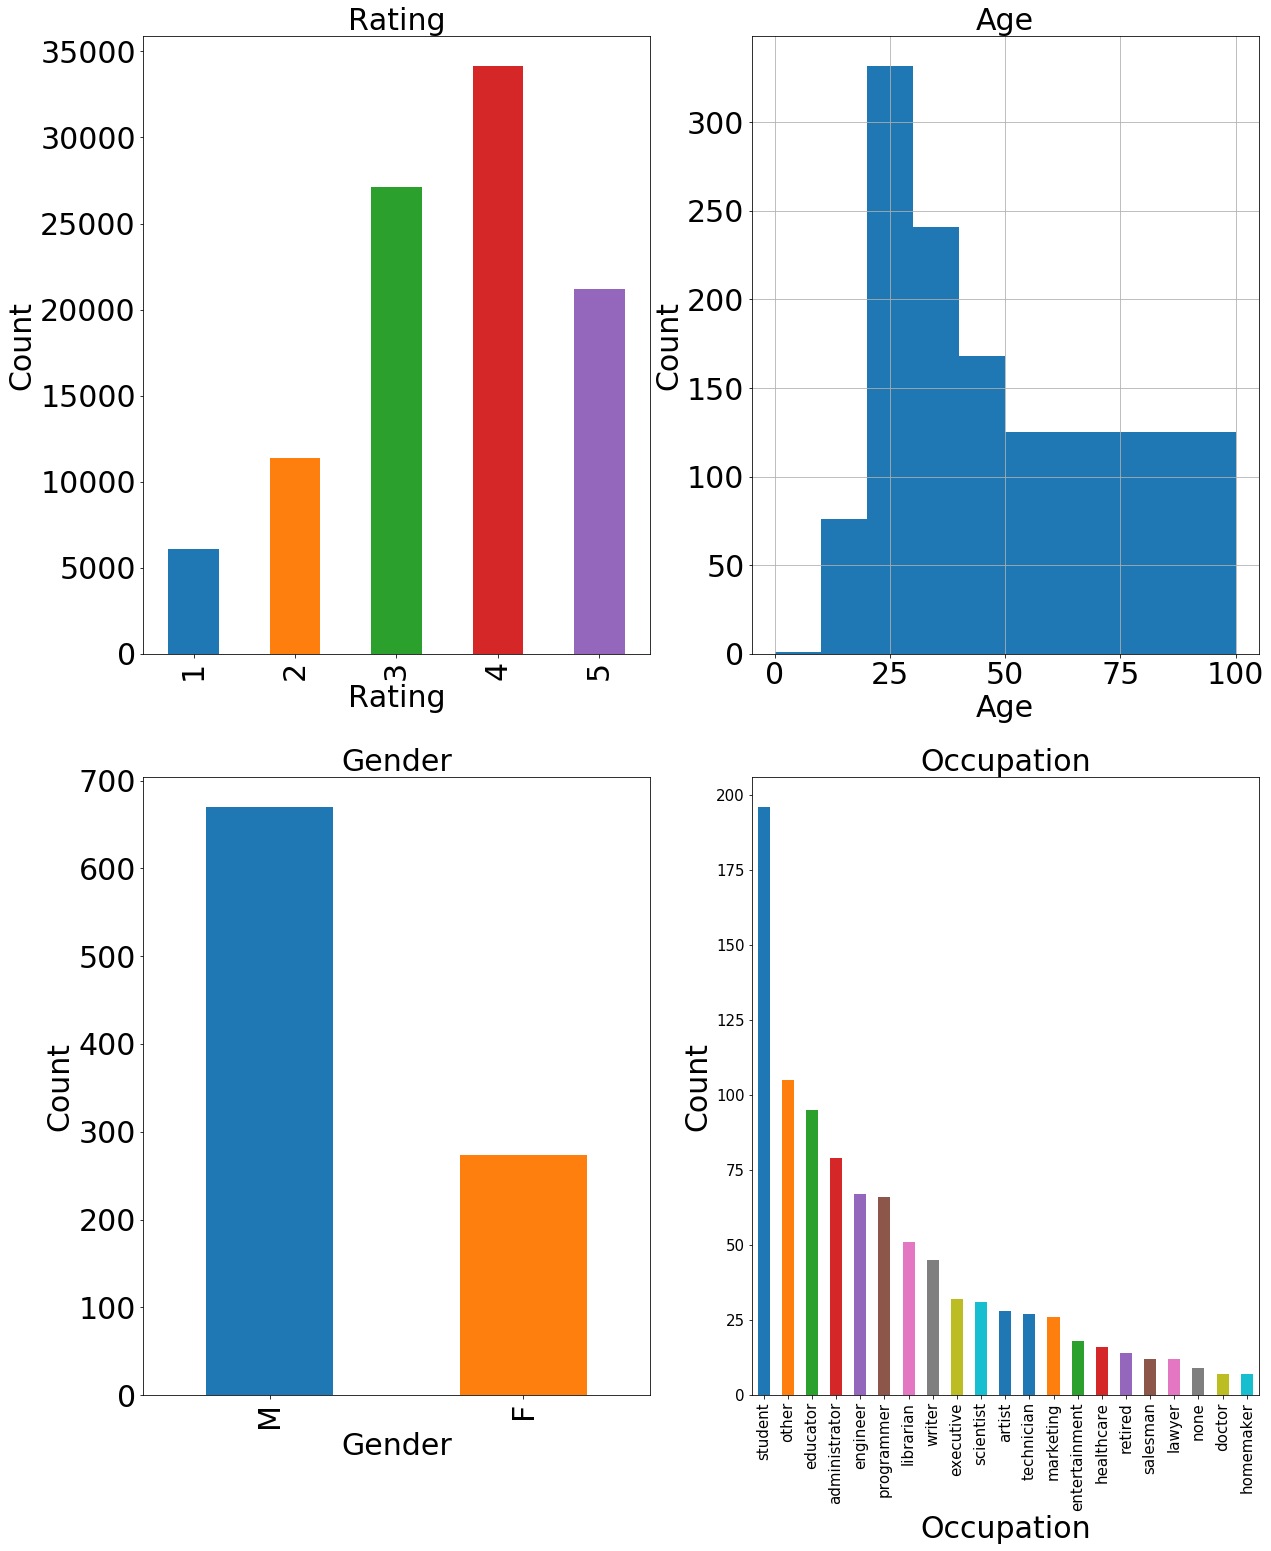

In [812]:
#fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=(20,5))
fig = plt.figure(figsize=(20,25))

plt.subplot(221)
plt.title('Rating').set_fontsize(30) 
data.Rating.value_counts(sort=False).plot(kind='bar')
plt.xlabel('Rating').set_fontsize(30) 
plt.ylabel('Count').set_fontsize(30) 
plt.tick_params(labelsize=30)

plt.subplot(222)
plt.title('Age').set_fontsize(30) 
user.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.xlabel('Age').set_fontsize(30) 
plt.ylabel('Count').set_fontsize(30) 
plt.tick_params(labelsize=30)

plt.subplot(223)
plt.title('Gender').set_fontsize(30) 
user.Gender.value_counts(sort=False).plot(kind='bar')
plt.xlabel('Gender').set_fontsize(30) 
plt.ylabel('Count').set_fontsize(30) 
plt.tick_params(labelsize=30)

plt.subplot(224)
plt.title('Occupation').set_fontsize(30) 
user.Occupation.value_counts(sort=True).plot(kind='bar')
plt.xlabel('Occupation').set_fontsize(30) 
plt.ylabel('Count').set_fontsize(30) 
plt.tick_params(labelsize=15)


plt.savefig('/Users/eklavya/Dropbox/Bath/Applied Data Science/Lab2/Report/Images/table.png', bbox_inches='tight')

